In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split

## Load Dataset 

In [2]:
df_full_feature = pd.read_csv('../Dataset/Normalisasi/processed_dataset_10_norm.csv',sep=',')
df_chi_square = pd.read_csv('../Dataset/Normalisasi/processed_dataset_chi_square_norm.csv', sep=',')
df_feature_selection = pd.read_csv('../Dataset/Normalisasi/processed_dataset_5_norm.csv',sep=',')
df_slice = pd.read_csv('../Dataset/Normalisasi/processed_dataset_slice_norm.csv',sep=',')

## Splitting Features And Label

In [3]:
# Dataset Full Feature
full_feature_x = df_full_feature[df_full_feature.columns[:9]]
full_feature_y = df_full_feature['label']

full_feature_x.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount
0,0.000000,0.941176,1.0,0.70579,0.705315,0.053163,0.716717,0.328245,0.174242
1,0.000000,0.941176,1.0,0.70579,0.705107,0.148857,0.734735,0.915781,0.486123
2,0.555556,0.941176,1.0,0.70579,0.705263,0.106326,0.744745,0.654498,0.347427
3,0.555556,0.941176,1.0,0.70579,0.705263,0.106326,0.744745,0.654498,0.347427
4,0.555556,0.941176,1.0,0.70579,0.705263,0.106326,0.744745,0.654498,0.347427


In [4]:
# Dataset Chi Square 
chi_square_x = df_chi_square[df_chi_square.columns[:5]]
chi_square_y = df_chi_square['label']

chi_square_x.head(5)

,dst,src,Protocol,pktcount,pktcount.1
0,0.941176,0.000000,1.0,0.174242,0.174242
1,0.941176,0.000000,1.0,0.486123,0.486123
2,0.941176,0.555556,1.0,0.347427,0.347427
3,0.941176,0.555556,1.0,0.347427,0.347427
4,0.941176,0.555556,1.0,0.347427,0.347427


In [5]:
# Dataset Feature Selection
feature_selection_x = df_feature_selection[df_feature_selection.columns[:5]]
feature_selection_y = df_feature_selection['label']

feature_selection_x.head(5)

,pktrate,pktperflow,Protocol,src,dst
0,0.70579,0.705315,1.0,0.000000,0.941176
1,0.70579,0.705107,1.0,0.000000,0.941176
2,0.70579,0.705263,1.0,0.555556,0.941176
3,0.70579,0.705263,1.0,0.555556,0.941176
4,0.70579,0.705263,1.0,0.555556,0.941176


In [6]:
# Dataset Slice
slice_x = df_slice[df_slice.columns[:4]]
slice_y= df_slice['label']

slice_x.head(5)

,dst,src,Protocol,bytecount
0,0.941176,0.000000,1.0,0.328245
1,0.941176,0.000000,1.0,0.915781
2,0.941176,0.555556,1.0,0.654498
3,0.941176,0.555556,1.0,0.654498
4,0.941176,0.555556,1.0,0.654498


### Full Features Model

In [74]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(full_feature_x,full_feature_y,test_size=0.30,random_state=5)

In [75]:
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

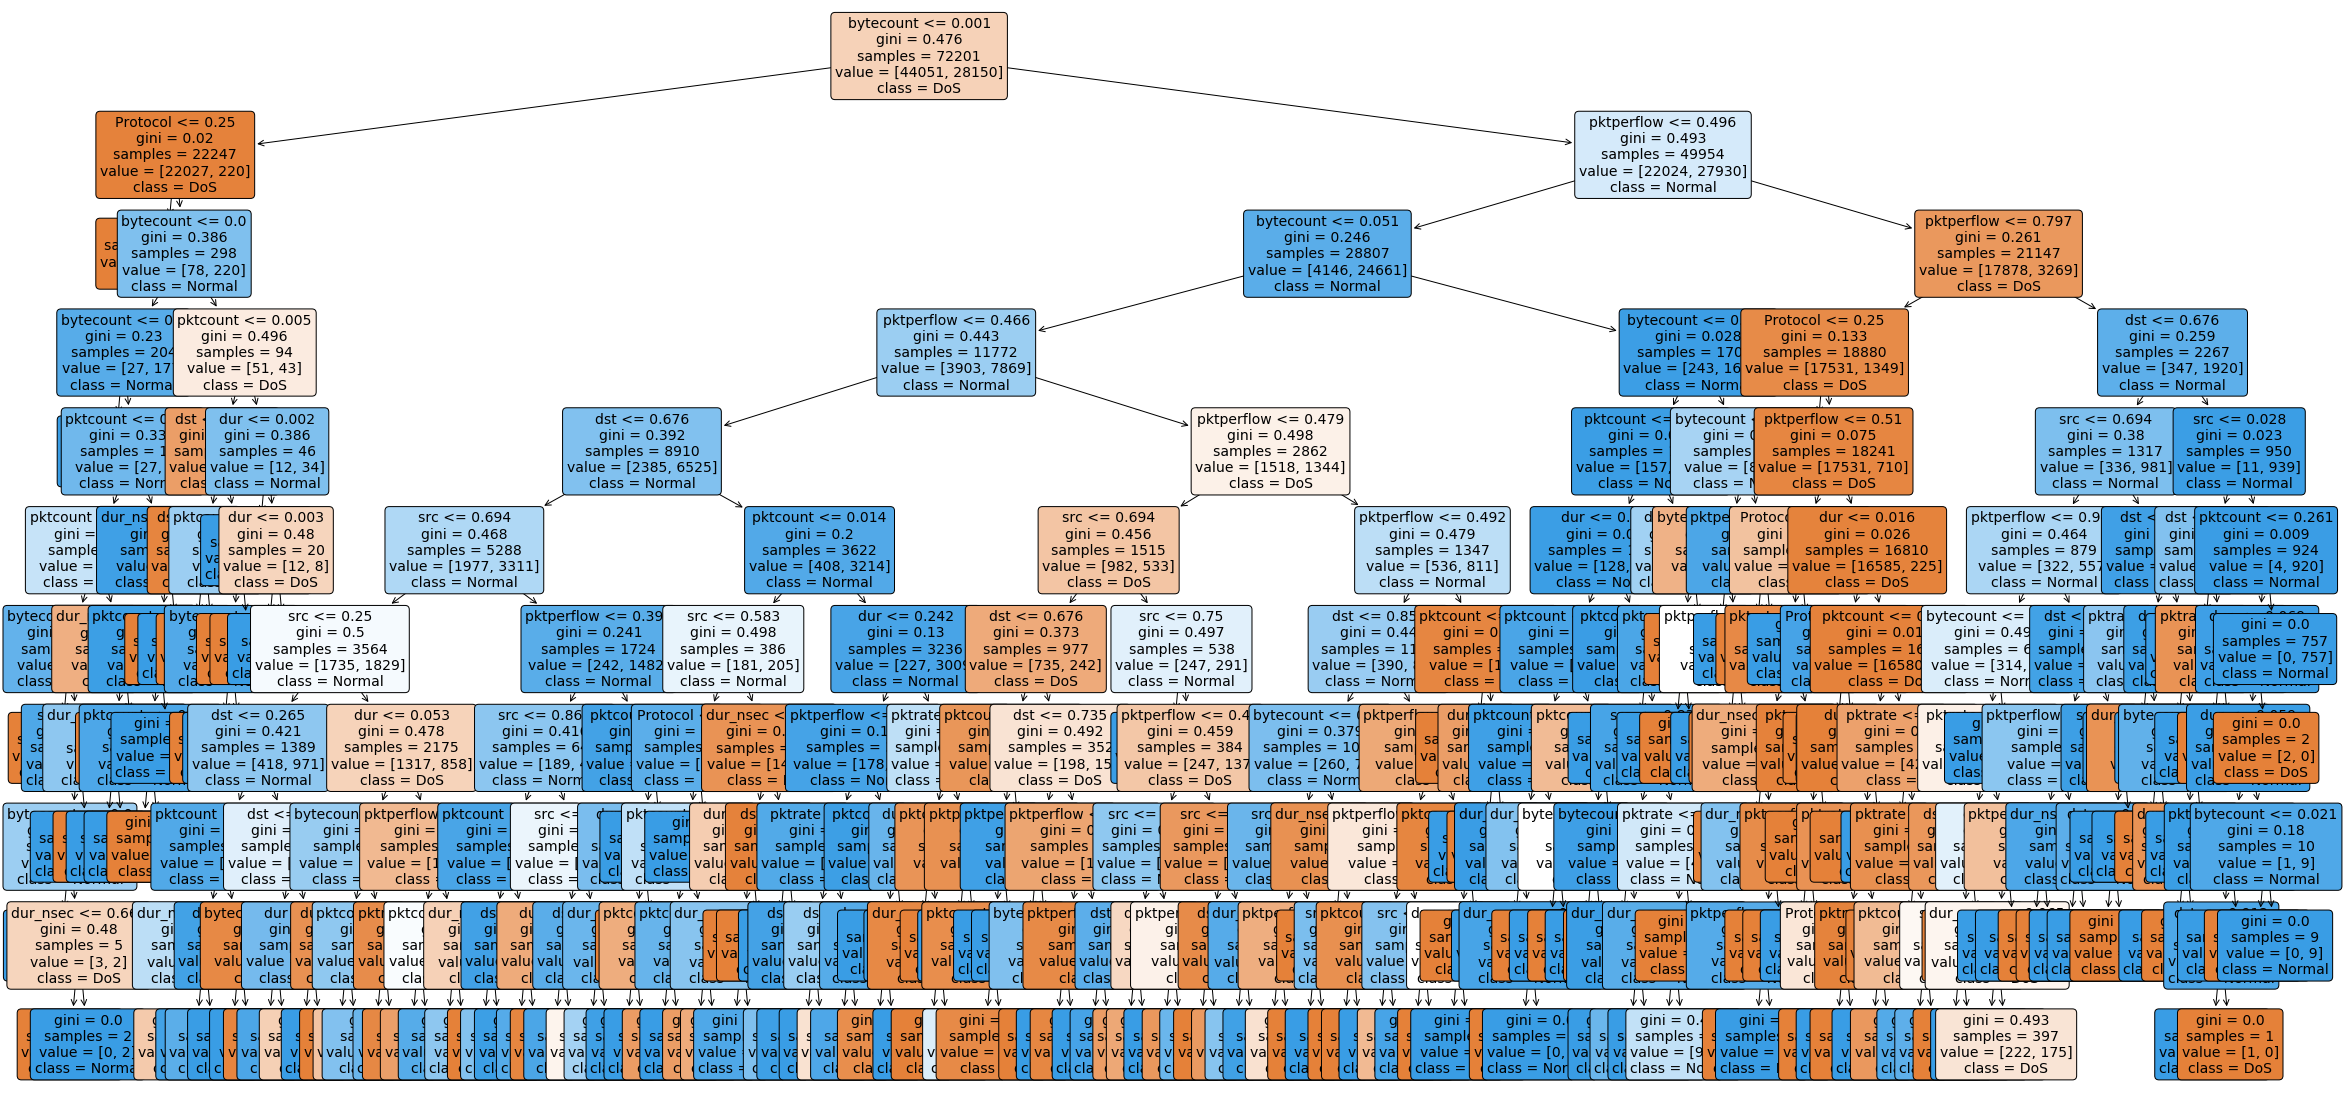

In [76]:
plt.figure(figsize=(40,20))
a = tree.plot_tree(classifier, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [77]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [78]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[44051     0]
 [28150     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     44051
           1       0.00      0.00      0.00     28150

    accuracy                           0.61     72201
   macro avg       0.31      0.50      0.38     72201
weighted avg       0.37      0.61      0.46     72201

Accuracy: 61.01162033766845


In [79]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[18744     0]
 [12200     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.75     18744
           1       0.00      0.00      0.00     12200

    accuracy                           0.61     30944
   macro avg       0.30      0.50      0.38     30944
weighted avg       0.37      0.61      0.46     30944

Accuracy: 60.57394002068253


### Chi Square Model

In [80]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(chi_square_x,chi_square_y,test_size=0.30,random_state=5)

In [81]:
classifier_chi = DecisionTreeClassifier(max_depth=11)
classifier_chi.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11)

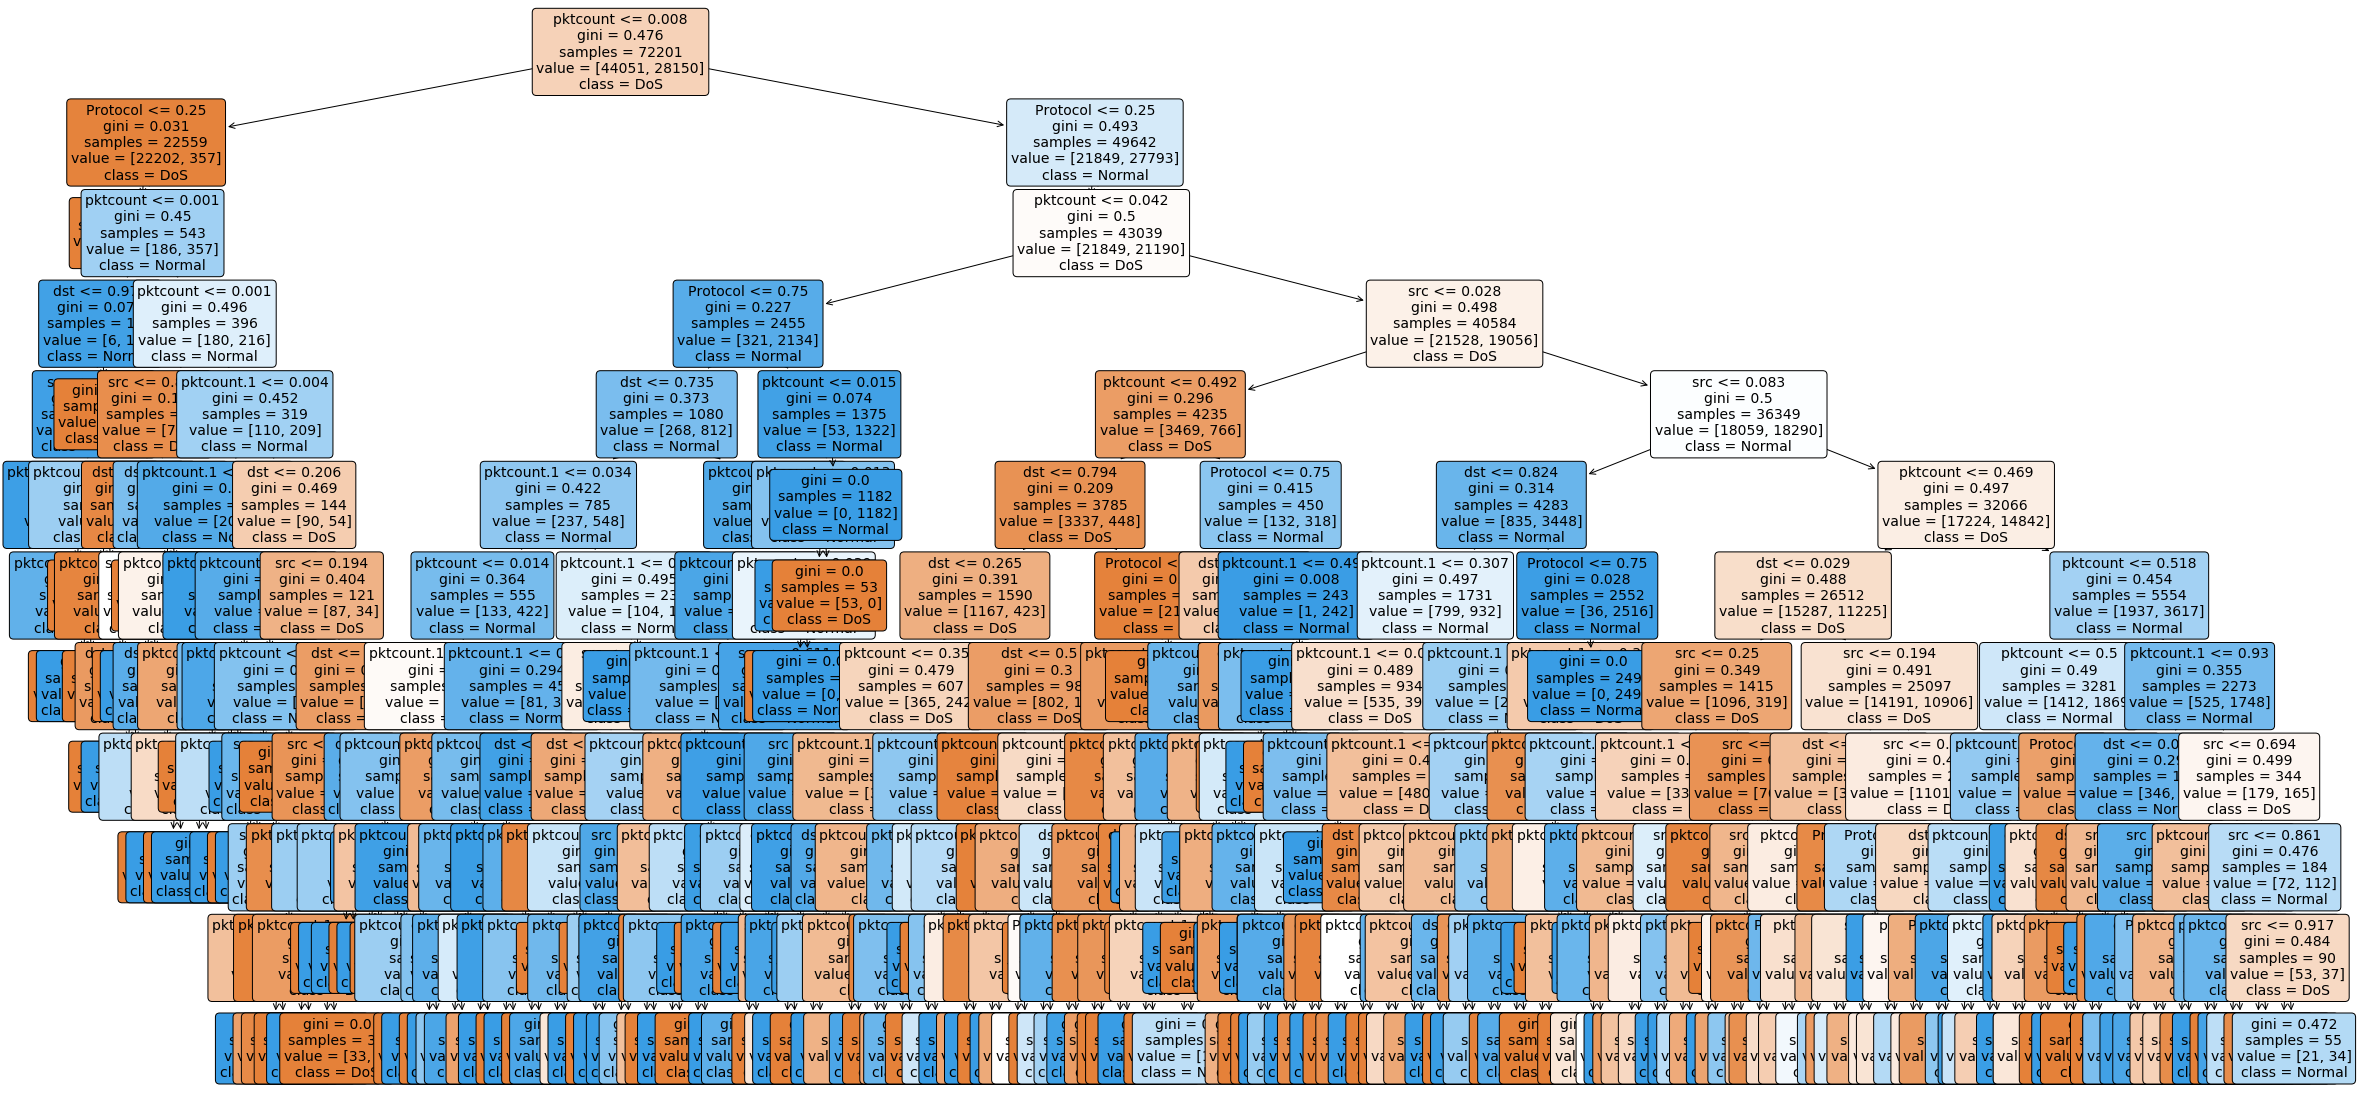

In [82]:
plt.figure(figsize=(40,20))
a = tree.plot_tree(classifier_chi, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [83]:
y_pred_train = classifier_chi.predict(x_train)
y_pred_test = classifier_chi.predict(x_test)

In [84]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[44051     0]
 [28150     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     44051
           1       0.00      0.00      0.00     28150

    accuracy                           0.61     72201
   macro avg       0.31      0.50      0.38     72201
weighted avg       0.37      0.61      0.46     72201

Accuracy: 61.01162033766845


In [85]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[18744     0]
 [12200     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.75     18744
           1       0.00      0.00      0.00     12200

    accuracy                           0.61     30944
   macro avg       0.30      0.50      0.38     30944
weighted avg       0.37      0.61      0.46     30944

Accuracy: 60.57394002068253


### Feature Selection

In [54]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(feature_selection_x,feature_selection_y,test_size=0.30,random_state=5)

In [55]:
classifier_feature = DecisionTreeClassifier(max_depth=6)
classifier_feature.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

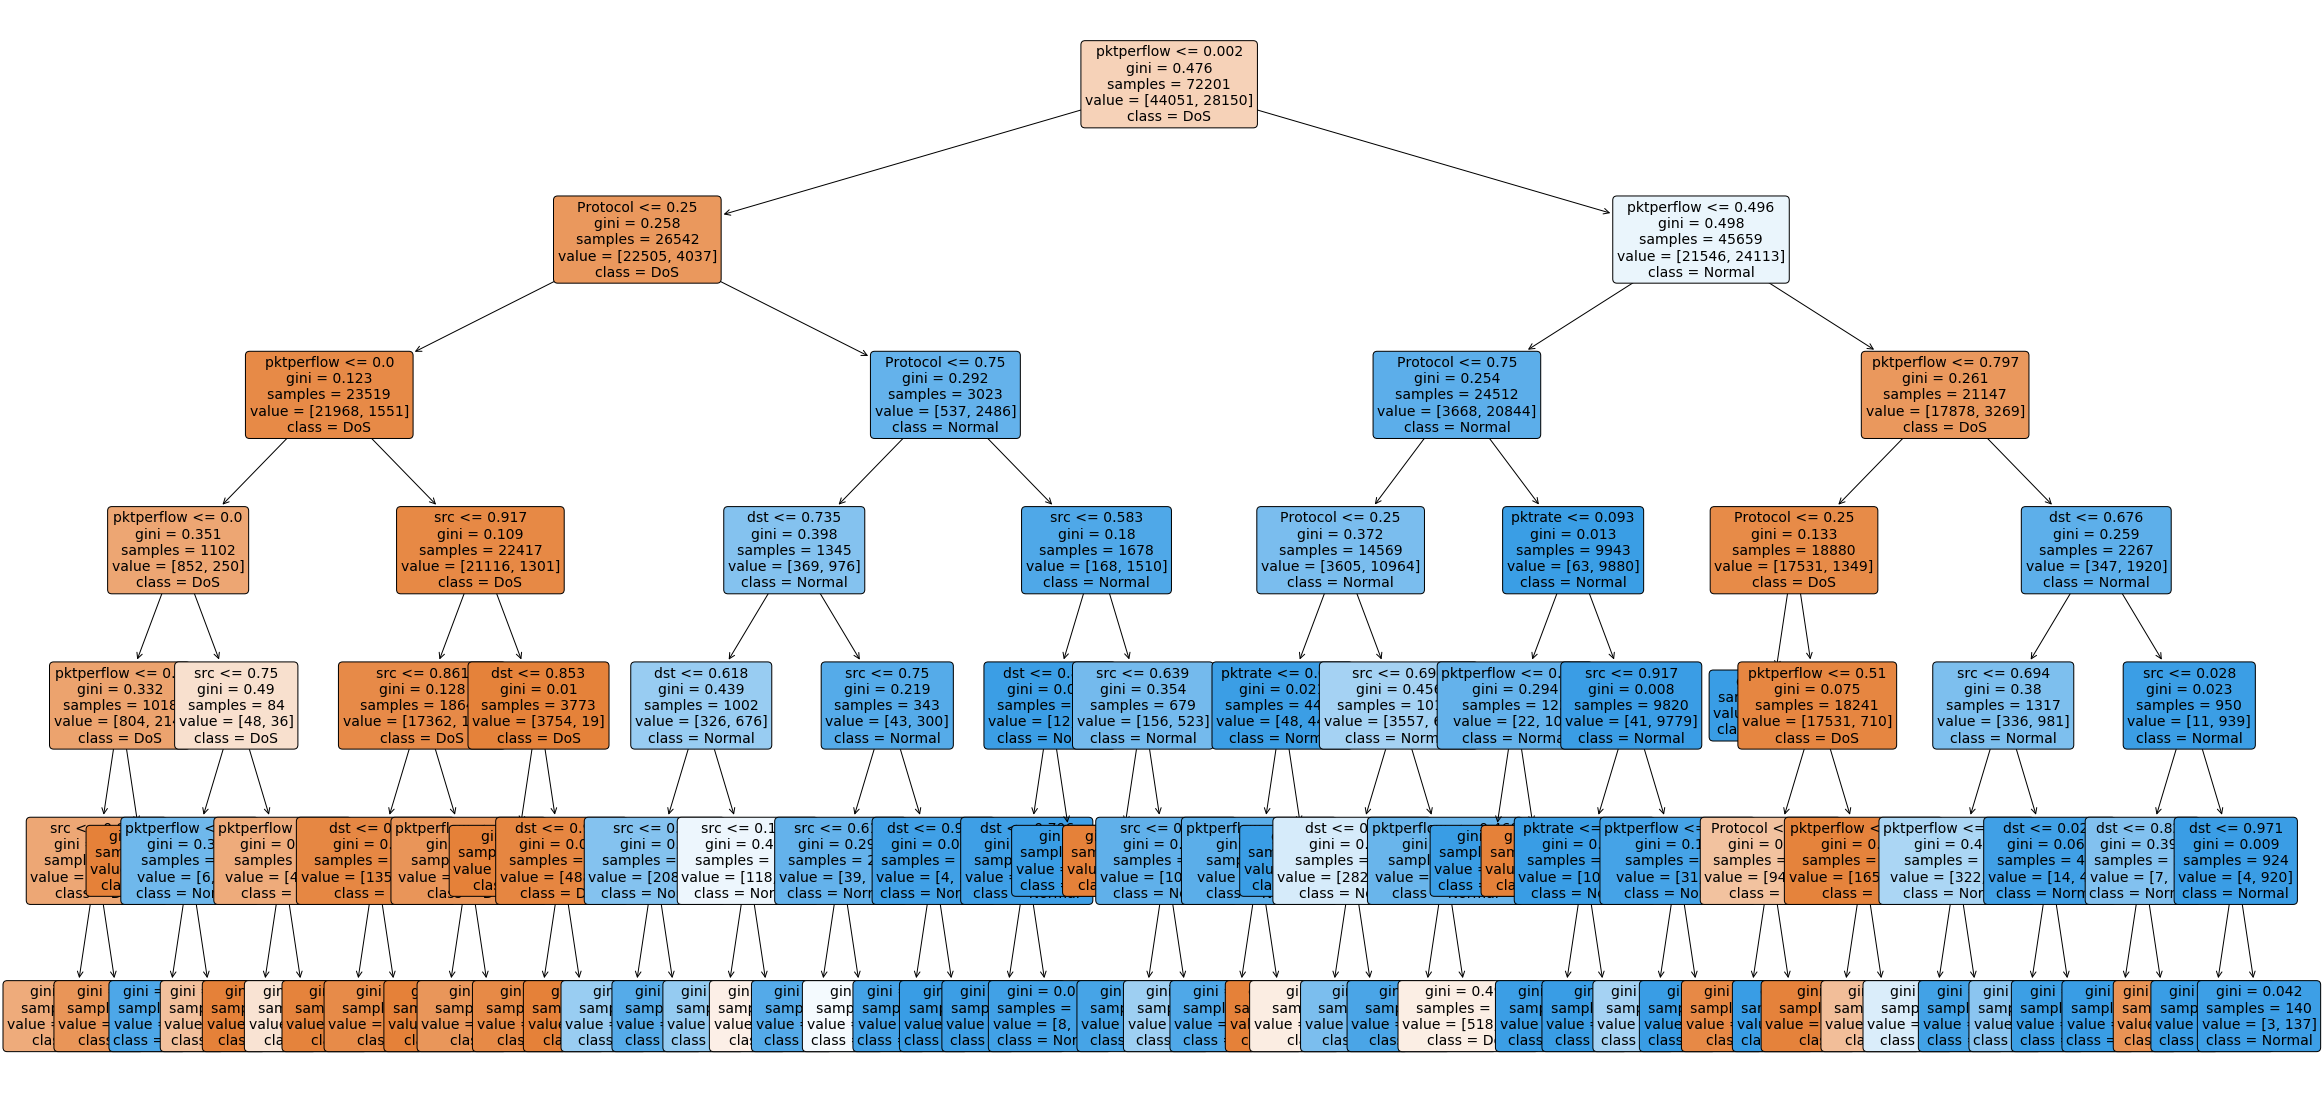

In [56]:
plt.figure(figsize=(40,20))
a = tree.plot_tree(classifier_feature, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [57]:
y_pred_train = classifier_feature.predict(x_train)
y_pred_test = classifier_feature.predict(x_test)

In [58]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[44051     0]
 [28150     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     44051
           1       0.00      0.00      0.00     28150

    accuracy                           0.61     72201
   macro avg       0.31      0.50      0.38     72201
weighted avg       0.37      0.61      0.46     72201

Accuracy: 61.01162033766845


In [59]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[18744     0]
 [12200     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.75     18744
           1       0.00      0.00      0.00     12200

    accuracy                           0.61     30944
   macro avg       0.30      0.50      0.38     30944
weighted avg       0.37      0.61      0.46     30944

Accuracy: 60.57394002068253


### Slice Model

In [60]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(slice_x,slice_y,test_size=0.30,random_state=5)

In [62]:
classifier_slice = DecisionTreeClassifier(max_depth=6)
classifier_slice.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

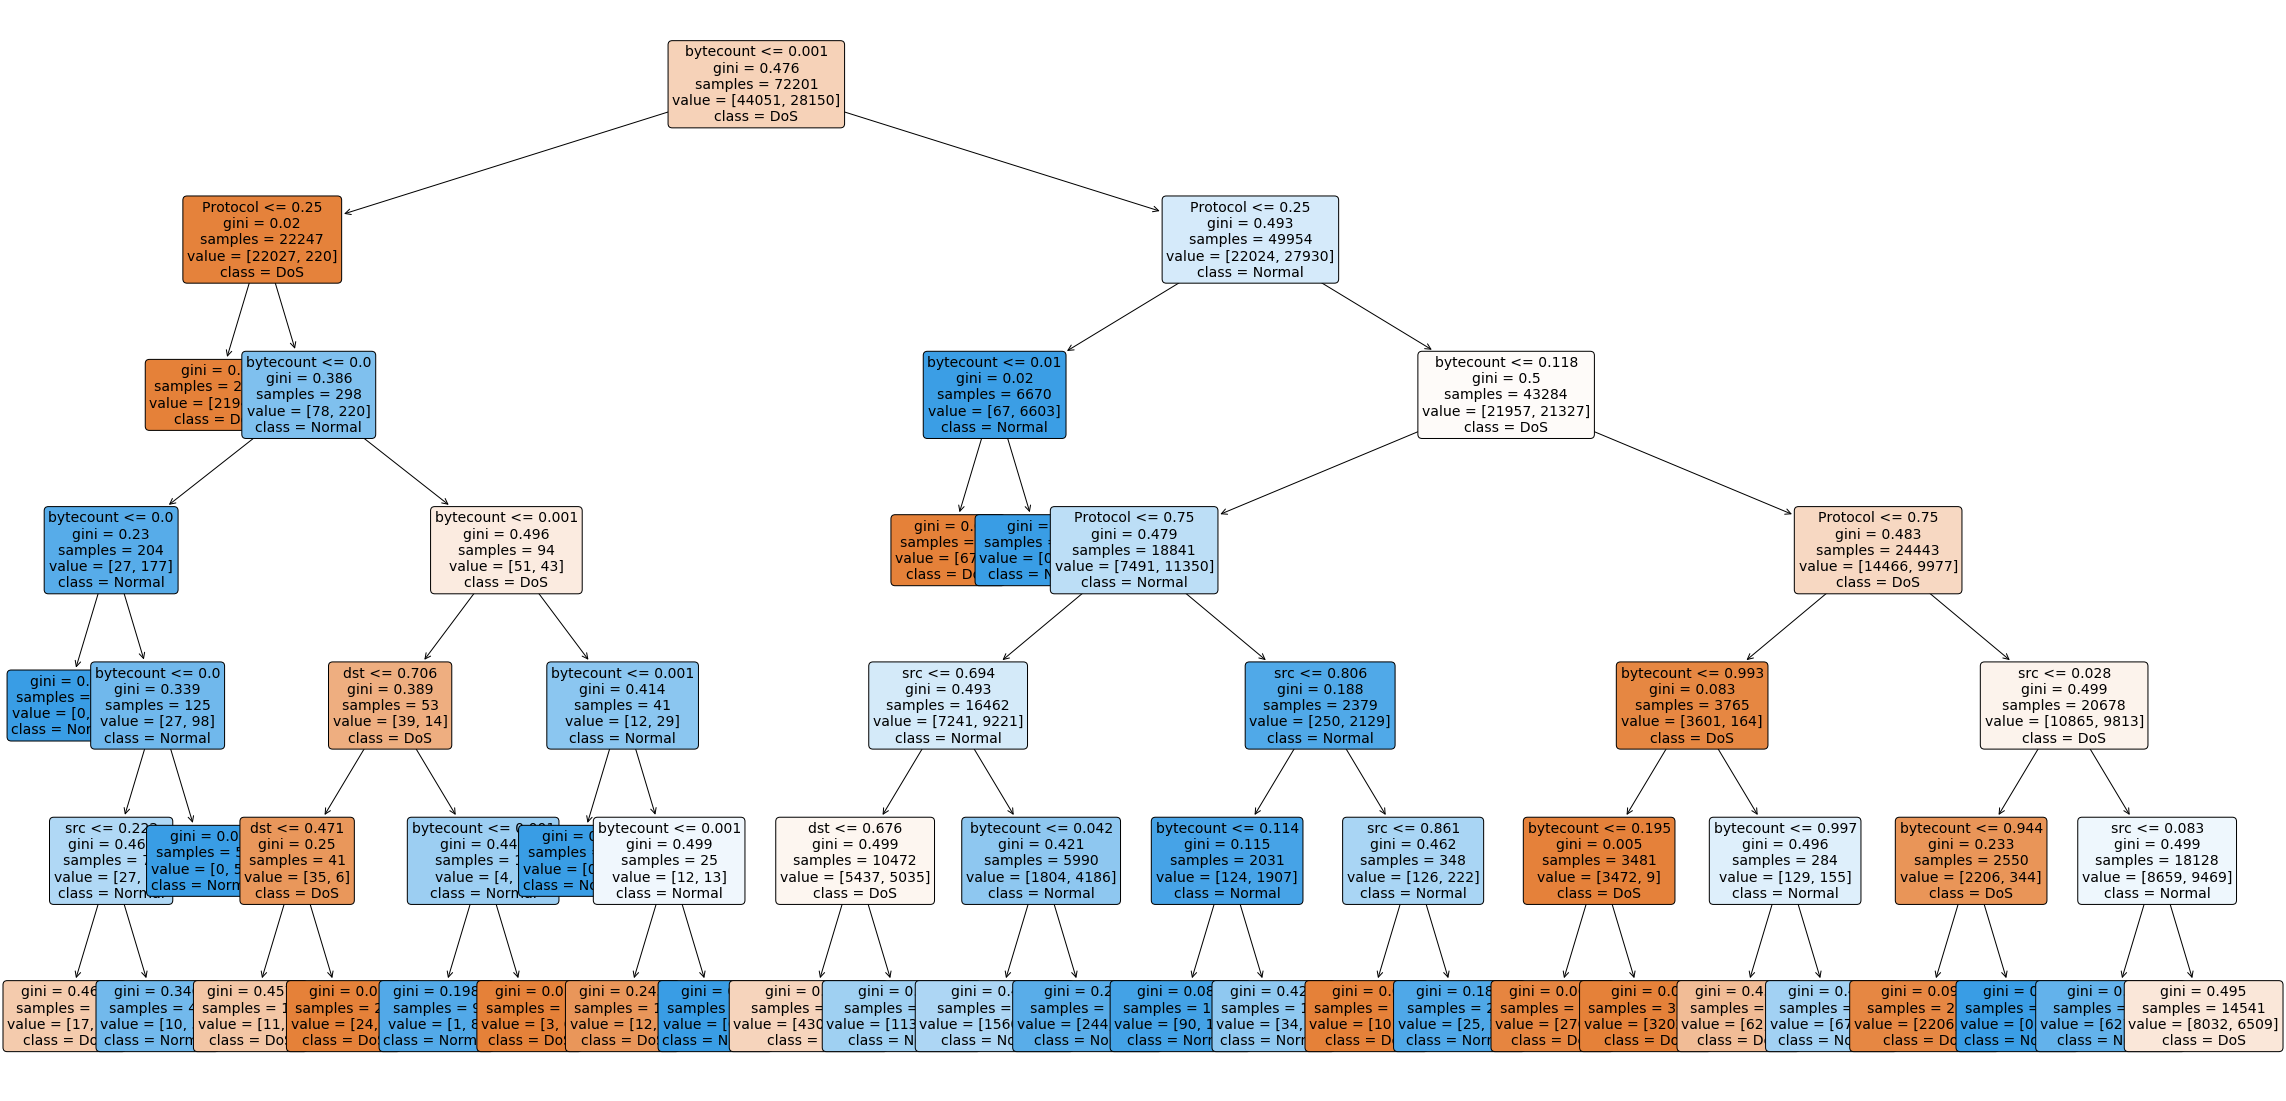

In [63]:
plt.figure(figsize=(40,20))
a = tree.plot_tree(classifier_slice, 
              feature_names=x_train.columns, 
              class_names=['DoS','Normal'],
              filled=True, 
              rounded=True, 
              fontsize=14)

In [64]:
y_pred_train = classifier_slice.predict(x_train)
y_pred_test = classifier_slice.predict(x_test)

In [65]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[44051     0]
 [28150     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     44051
           1       0.00      0.00      0.00     28150

    accuracy                           0.61     72201
   macro avg       0.31      0.50      0.38     72201
weighted avg       0.37      0.61      0.46     72201

Accuracy: 61.01162033766845


In [66]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[18744     0]
 [12200     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.75     18744
           1       0.00      0.00      0.00     12200

    accuracy                           0.61     30944
   macro avg       0.30      0.50      0.38     30944
weighted avg       0.37      0.61      0.46     30944

Accuracy: 60.57394002068253
